## 기사 단어뽑기

In [1]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen

import pandas as pd
import re


from konlpy.tag import Twitter
from urllib.request import urlopen
from lxml import html
from collections import Counter

import random
import pytagcloud      # requires Korean font support
import webbrowser

from datetime import datetime, timedelta
import nltk

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
Thema = input("주제를 입력하세요.  ex) society \n")
end_date = input("시작 날짜를 입력하세요.  ex) 20181007 \n")
start_date = input("마지막 날짜를 입력하세요.  ex) 20181115 \n")
choose = input("제목만 가져오려면 : 1\n본문까지 가져오려면 : 2 \n")

end_date = end_date[:4] + '.' + end_date[4:6] + '.' + end_date[6:]
start_date = start_date[:4] + '.' + start_date[4:6] + '.' + start_date[6:]

주제를 입력하세요.  ex) society 
society
시작 날짜를 입력하세요.  ex) 20181007 
20180401
마지막 날짜를 입력하세요.  ex) 20181115 
20180630
제목만 가져오려면 : 1
본문까지 가져오려면 : 2 
1


In [3]:
if choose == '1':
    word = pd.read_csv('./TeamMission/segye_%s_title_(%s - %s).csv' % (Thema, end_date, start_date), sep=',', encoding='utf-8')
else:
    word = pd.read_csv('./TeamMission/segye_%s_(%s - %s).csv' % (Thema, end_date, start_date), sep=',', encoding='utf-8')

del word['Unnamed: 0']

In [4]:
word.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 2 columns):
Title    5050 non-null object
Date     5050 non-null object
dtypes: object(2)
memory usage: 79.0+ KB


In [5]:
word.head(10)

,Title,Date
0,울산대교서 소방공무원 투신 사망,2018.06.30
1,장맛비 뚫고… 서울·제주서 난민 반대 집회 열려,2018.06.30
2,"오거돈 부산시장, 태풍에 취임식 취소하고 대책회의",2018.06.30
3,교도소 나온 날 술집서 행패…또 구속된 50대,2018.06.30
4,"""최저임금 개정안 폐기""… 광화문 가득 메운 노동자들",2018.06.30
5,"특검, 드루킹 2차 소환조사…댓글조작 경위·방법 추궁",2018.06.30
6,"위드유 헌신에 열정페이 웬말?… 법무부 ""예산 늘리겠다""",2018.06.30
7,장마전선에 움츠린 주말…해수욕장·관광지 한산,2018.06.30
8,"""왜 치료 안 해줘, 대통령 데려와""…응급실 행패 50대",2018.06.30
9,콧대 높던 금융맨… 블루칼라도 부러웠다,2018.06.30


In [6]:
word.tail(10)

,Title,Date
5040,박근혜 국정 농단 1심 선고…법원 사상 첫 생중계될까,2018.04.01
5041,"고양터미널 화재 경보기 오작동…""10분간 어떤 대응도 없었다""",2018.04.01
5042,"""한일 위안부 합의…대통령 재량으로 철회·종료 가능""",2018.04.01
5043,2017년 112 허위신고 가장 큰 이유는…사회 불만,2018.04.01
5044,"금호타이어 일부 노조원 ""해외매각 부결"" 주장…투표결과 촉각",2018.04.01
5045,무면허 사고 후 운전자 바꿔치기 공모…가·피해자 모두 실형,2018.04.01
5046,"""편히 쉬세요""…위안부 피해자 안점순 할머니 영면",2018.04.01
5047,"법원 ""학원 셔틀버스 기사 폐렴 발병은 업무상 재해""",2018.04.01
5048,[김동환의 일요세상] 우리 아이는 안 그럴 거라 믿었는데…거짓말에 충격받는 부모들,2018.04.01
5049,[김현주의 일상 톡톡] 한반도 평화의 봄 도래?…당장 먹고사는 게 우선이란 시각도,2018.04.01


In [7]:
len(word)

5050

#### DataFrame -> List -> String

In [8]:
words = str()

start = datetime.now()

if choose == '1':
    for i in range(len(list(word['Title']))):
        words += str(list(word['Title'])[i])
else:
    for i in range(len(list(word['News']))):
        words += str(list(word['News'])[i])

end = datetime.now()
elapsed = end - start
print('총 계산 시간: ', end='');   print(elapsed)

총 계산 시간: 0:00:00.747043


In [9]:
words[:1000]

'울산대교서 소방공무원 투신 사망장맛비 뚫고… 서울·제주서 난민 반대 집회 열려오거돈 부산시장, 태풍에 취임식 취소하고 대책회의교도소 나온 날 술집서 행패…또 구속된 50대"최저임금 개정안 폐기"… 광화문 가득 메운 노동자들특검, 드루킹 2차 소환조사…댓글조작 경위·방법 추궁위드유 헌신에 열정페이 웬말?… 법무부 "예산 늘리겠다"장마전선에 움츠린 주말…해수욕장·관광지 한산"왜 치료 안 해줘, 대통령 데려와"…응급실 행패 50대콧대 높던 금융맨… 블루칼라도 부러웠다"사무직 집착 내려놓고 ‘평생 기술’ 익혀두면 좋아"불안한 노후…명퇴 김부장의 재취업 분투기김경수 도정 카운트다운…완전히 새로운 경남 문구 부착4년 만에 재개된 아이스버킷 챌린지…한 달 만에 9억원 모금[저출산 개인 아닌 사회문제-상] 서울 도심에서 아이 낳는 건 무모한 도전?[저출산 개인 아닌 사회문제-하] 일자리·거주·교육 동시 개선해야 출산율 회복 가능동반자살서 홀로 살아남은 남성에 자살방조 집행유예월미도서 수직낙하하는 놀이기구 추락…5명 부상법원 "교육부가 출처표시 없이 교사 책 전재…위자료 지급"[김기자와 만납시다] 미추홀구로 태어나는 인천 남구…시민들이 지켜보고 있다"예고까지 했는데"…자유로 음주운전 14명 적발프랑스 혁명서 출발, 미국서 꽃피운 페미니즘"성차별 철폐" vs "또 다른 혐오"… 페미니즘 논란 확산아이들의 묻지마 투척…공포에 떠는 아파트 주민들“소년법 폐지?…우리나라 사법 발전에 역행”"내부고발하면 가족도 죽인다" 협박한 울산해경 간부, 감봉 2개월[일상톡톡 플러스] "스마트폰 없이 아이 잘 키우는 사람 많다고?"58.8% "휴가지에서 즉석만남 갖는다"직원 20명 임금·퇴직금 7억원 떼먹고 도주한 사장 구속또 10대 충북 제천서 무면허 만취 운전자 경찰차 들이 받아 5명 부상4대강 수문 개방 1년… 조류 최대 41% 감소참새에 떡보시 하는 할머니… 전생에 인연 있었을까여교수·여직원 … 이젠  女 빼주세요가족·공동체 삶의 질, 10년 전보다 더 나빠졌다우송대, 창업메뉴경진대회 개

In [10]:
len(words)

156306

#### 트위터

In [11]:
start = datetime.now()

twitter = Twitter()
nouns3 = twitter.nouns(words)
count3 = Counter(nouns3)

end = datetime.now()
elapsed = end - start
print('총 계산 시간: ', end='');   print(elapsed)

C:\python\Anaconda3-52\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


총 계산 시간: 0:00:15.127865


#### 단어 저장 (주석)

if choose == '1':
    common_word.to_csv('./TeamMission/segye_%s_title_word_utf_(%s - %s).csv'% (Thema, end_date, start_date), sep=',', encoding='utf-8')
    common_word.to_csv('./TeamMission/segye_%s_title_word_euc_(%s - %s).csv'% (Thema, end_date, start_date), sep=',', encoding='euc-kr')
else:
    common_word.to_csv('./TeamMission/segye_%s_word_utf_(%s - %s).csv'% (Thema, end_date, start_date), sep=',', encoding='utf-8')
    common_word.to_csv('./TeamMission/segye_%s_word_euc_(%s - %s).csv'% (Thema, end_date, start_date), sep=',', encoding='euc-kr')

#### 단어 분류

In [12]:
one_words = []
two_words = []
etc_words = []

for noun in nouns3:
    if len(noun) == 1:
        one_words.append(noun)
    elif len(noun) == 2:
        two_words.append(noun)
    else:
        etc_words.append(noun)
        
len(one_words), len(two_words), len(etc_words)

(5223, 25596, 7796)

In [13]:
one_words = list(set(one_words))
two_words = list(set(two_words))
etc_words = list(set(etc_words))

len(one_words), len(two_words), len(etc_words)

(475, 4934, 2522)

In [14]:
for word in one_words:
    print(word, end='\t')

킹	욕	덤	삵	꽝	돈	닭	준	벨	을	팽	틈	계	재	듯	모	투	펑	체	렬	술	막	엘	궐	검	툭	송	화	갓	삶	힘	뚝	안	글	판	며	도	외	엽	은	율	끼	몸	총	어	유	존	녀	빛	음	뷔	률	땐	늦	더	여	량	축	손	무	설	찮	부	제	발	임	림	실	밥	액	귀	민	암	경	려	퇴	회	강	영	흠	칼	윤	합	땅	앗	흥	너	월	불	괌	형	맘	범	쌀	토	진	횡	매	마	쉐	응	걸	몇	옥	간	수	순	권	두	꽉	환	이	뼈	낫	쏙	폰	욱	척	거	결	방	론	새	업	료	악	몫	측	게	항	시	별	충	흉	프	롤	턴	달	톤	좀	속	롯	곧	누	뿔	착	탁	씨	족	웬	낮	뜸	못	댁	집	촌	뻘	공	살	독	과	좇	쥬	밤	하	밖	태	생	트	편	세	노	찍	박	찌	통	란	길	북	만	꿈	죽	휘	패	턱	평	질	전	죄	늪	빵	산	금	닝	울	령	습	친	뒤	봄	꼭	배	님	열	말	버	깡	문	중	쫙	내	컵	균	텅	일	겨	폐	데	추	창	목	케	잔	홀	쩍	직	앱	물	푹	풀	답	증	웹	팔	확	터	똥	폭	채	멍	병	메	파	꿩	김	털	눈	룰	원	백	피	낼	뻔	린	꽃	규	급	알	요	뜻	바	쇼	블	능	붐	뿐	주	감	카	팬	첫	겸	것	보	용	줄	소	곳	핏	젠	핀	상	인	연	교	놈	초	적	봉	펫	심	쟁	겁	키	덩	관	넛	휠	빚	국	담	징	날	았	밸	쪽	찬	홍	끌	티	건	잣	류	갑	예	팩	톡	덜	빈	삽	약	곡	오	쿵	등	옷	네	굴	법	떼	뱀	품	또	복	잡	돌	반	텄	선	칩	남	푼	싹	장	표	딸	비	위	및	숲	워	스	왜	차	쾅	탓	렸	명	조	뻥	온	육	함	쇠	탑	멸	헬	그	변	옆	낯	개	넌	밀	밑	끝	군	책	잠	년	짐	입	망	사	논	정	늘	왕	밭	행	코	호	웅	혹	학	리	섬	석	기	삐	처	벽	헛	성	궁	황	자	던	난	면	빼	객	헌	층	맛	핵	고	침	철	나	운	셀	립	점	해	후	번	치	짓	엎	뇌	맹	청	승	신	뭐	톱	떫	쌈	역	삼	절	의	값	맨	식	애	당	탈	골	익	앞	숨	분	농	떡	쇄	볼	팅	종	굿	로	팀	썸	둘	최	뺨	덕	단	향	저	구	때	봇	특	

#### stop_words 생성

In [15]:
stop_words = []
sw_time = ['오늘', '어제', '미래', '내일', '시작', '하루', '올해', '오전', '오후', '하루', '이번', '다시', '마지막','개월', '내년']
sw_various = ['알림','소식', '궂긴', '기업', '회장','최대','대통령','한국','청와대','대표','포토','의원','정부','정치','후보','추진','이유','달라','만난','누구','사진','직접','마련','리선']
sw_region = ['서울','대전','대구','부산','울산','광주','제주','제주도']

stop_words.extend(one_words)
stop_words.extend(sw_time)
stop_words.extend(sw_various)
stop_words.extend(sw_region)
stop_words.extend(one_words)

#### stop_words 빼기

In [16]:
nouns = [word for word in nouns3 if word not in stop_words]
len(nouns)

32369

In [17]:
common_word2 = Counter(nouns)

In [18]:
common_word2 = common_word2.most_common()

In [19]:
wordname = []
wordfreq = []

for i in range(len(common_word2)):
    wordname.append(common_word2[i][0])
    wordfreq.append(common_word2[i][1])
    
    ecolist = pd.DataFrame({'단어명' : wordname, '빈도수':wordfreq})

In [20]:
ecolist.head()

,단어명,빈도수
0,경찰,354
1,수사,189
2,폭행,188
3,검찰,155
4,혐의,150


In [21]:
ecolist.to_csv('./TeamMission/segye_%s_title_word_utf_(%s - %s).csv'% (Thema, end_date, start_date), sep=',', encoding='utf-8')

#### 워드클라우드 만들기

In [22]:
token = nltk.Text(nouns, name='기사')
type(token), len(token)

(nltk.text.Text, 32369)

In [23]:
token.vocab().most_common(30)

[('경찰', 354),
 ('수사', 189),
 ('폭행', 188),
 ('검찰', 155),
 ('혐의', 150),
 ('의혹', 147),
 ('조사', 144),
 ('드루', 143),
 ('징역', 136),
 ('여성', 128),
 ('재판', 120),
 ('구속', 113),
 ('논란', 111),
 ('살해', 100),
 ('성폭행', 95),
 ('사건', 91),
 ('사망', 90),
 ('조현민', 86),
 ('피해', 79),
 ('댓글', 78),
 ('이명희', 78),
 ('몰카', 77),
 ('불법', 76),
 ('톡톡', 75),
 ('영장', 75),
 ('성추행', 75),
 ('피해자', 75),
 ('직원', 71),
 ('일상', 69),
 ('구속영장', 68)]

#### 워드클라우드 한글폰트 설정

In [24]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [25]:
data = token.vocab().most_common(1000)
len(data)

1000

In [26]:
data[:10]

[('경찰', 354),
 ('수사', 189),
 ('폭행', 188),
 ('검찰', 155),
 ('혐의', 150),
 ('의혹', 147),
 ('조사', 144),
 ('드루', 143),
 ('징역', 136),
 ('여성', 128)]

#### data를 딕셔너리 형태로 변환

In [27]:
dict_data = dict(data)
len(dict_data)

1000

#### 워드클라우드 그리기

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

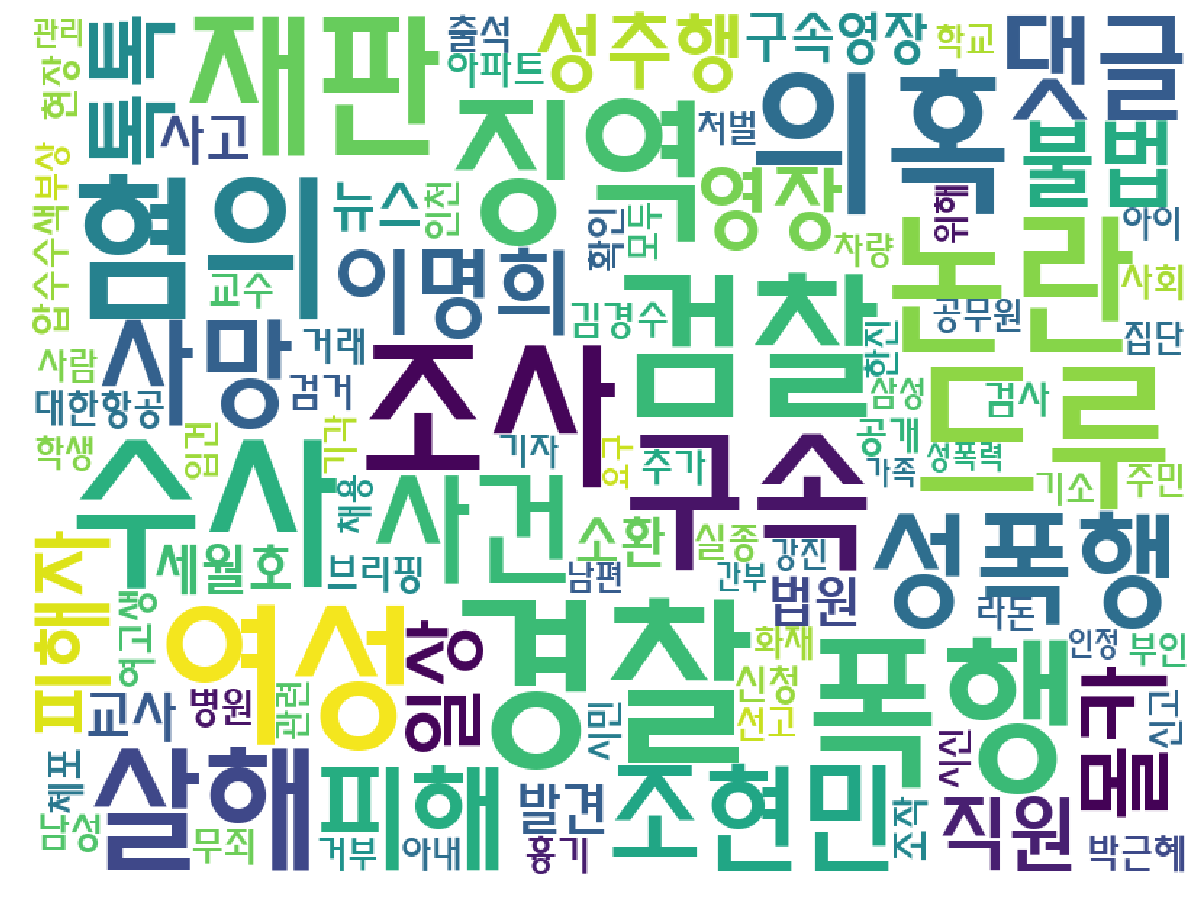

In [29]:
params = {
    "width"            : 800,
    "height"           : 600,
    "min_font_size"    : 2**3, 
    "max_font_size"    : 2**7, 
    "max_words"        : 100,
    "relative_scaling" : 0.2,
    # "font_path"        : 'C:/Windows/Fonts/malgun.ttf',
    "font_path"        : 'C:/Windows/Fonts/HMFMMUEX.TTC',
    "background_color" : 'white',
}

wordcolud = WordCloud(**params)
# wordcolud = wordcolud.generate(text) 
wordcolud = wordcolud.generate_from_frequencies(dict_data) 

if choose == '1':
    save_img = 'images/segye_%s_title_wordcloud_(%s - %s).png' % (Thema, end_date, start_date)
else:
    save_img = 'images/segye_%s_wordcloud_(%s - %s).png' % (Thema, end_date, start_date)

plt.figure(figsize=(24,16))
plt.imshow(wordcolud)
plt.axis('off')
plt.savefig(save_img)